Testing Runge-Kutta methods...


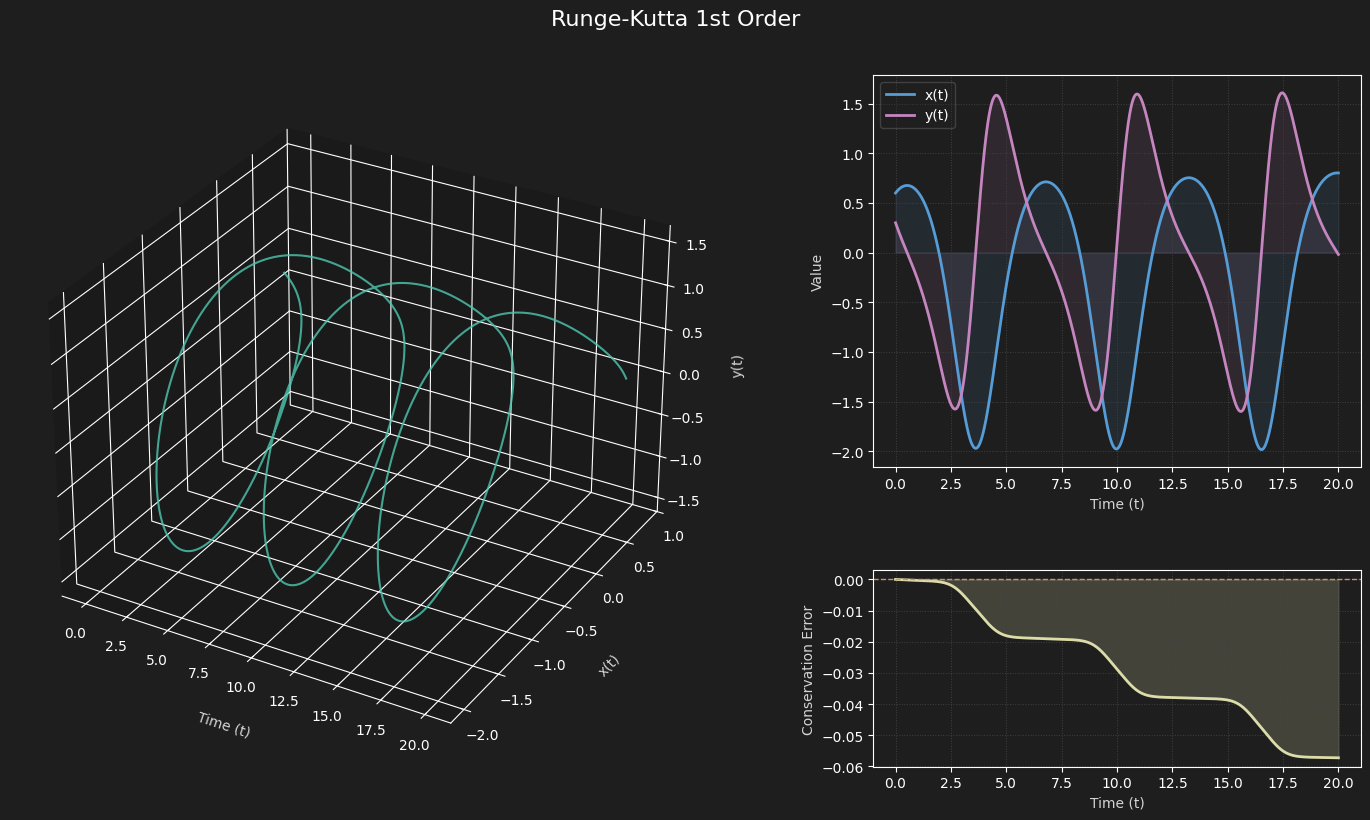

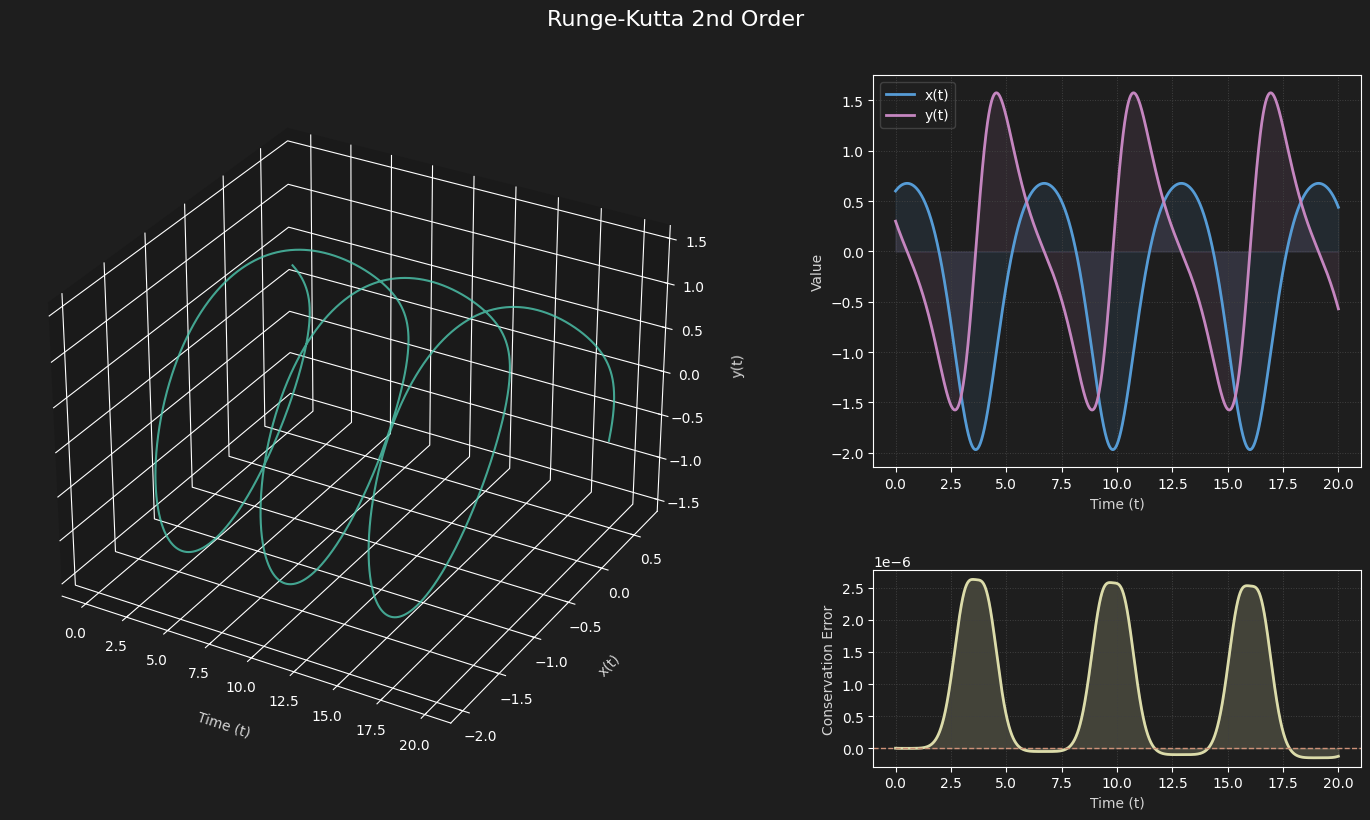

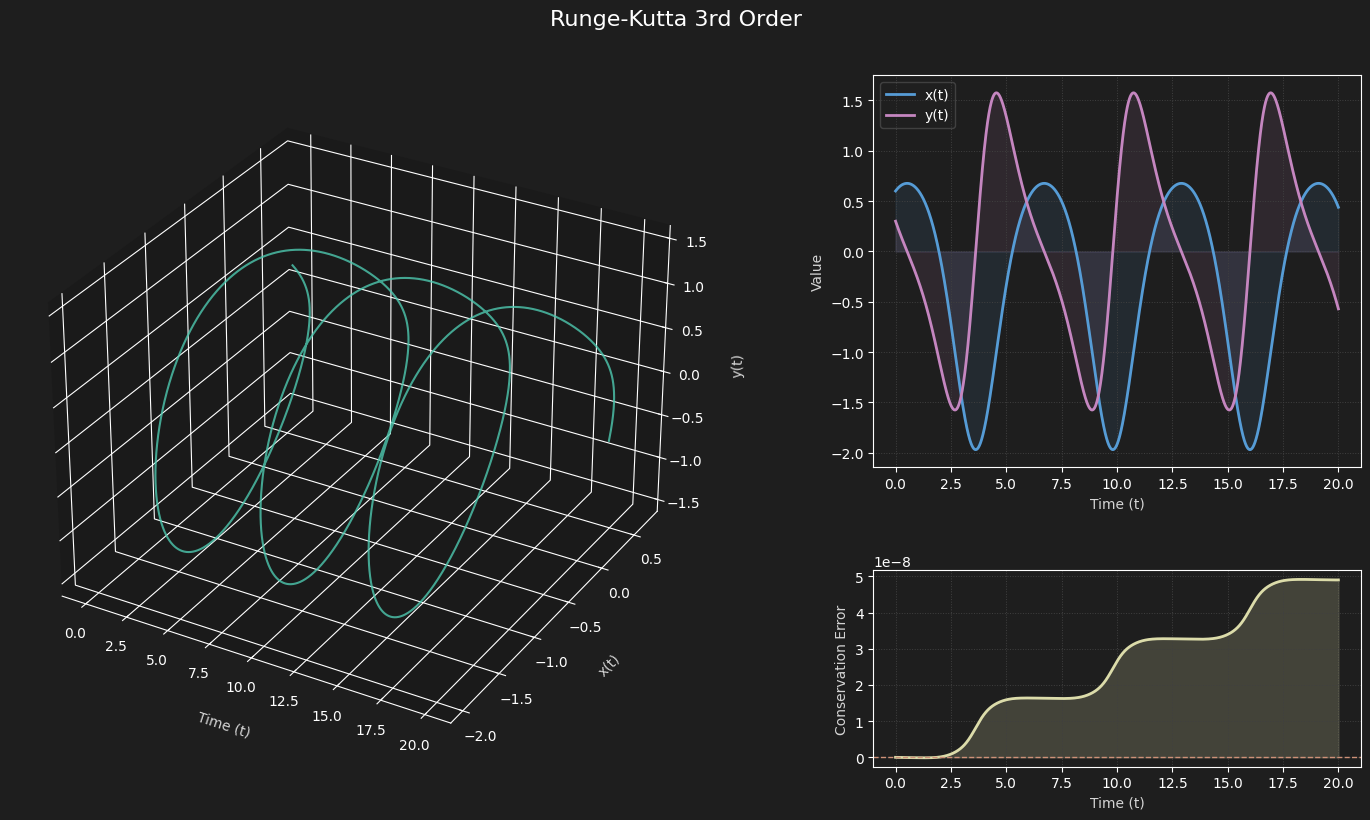

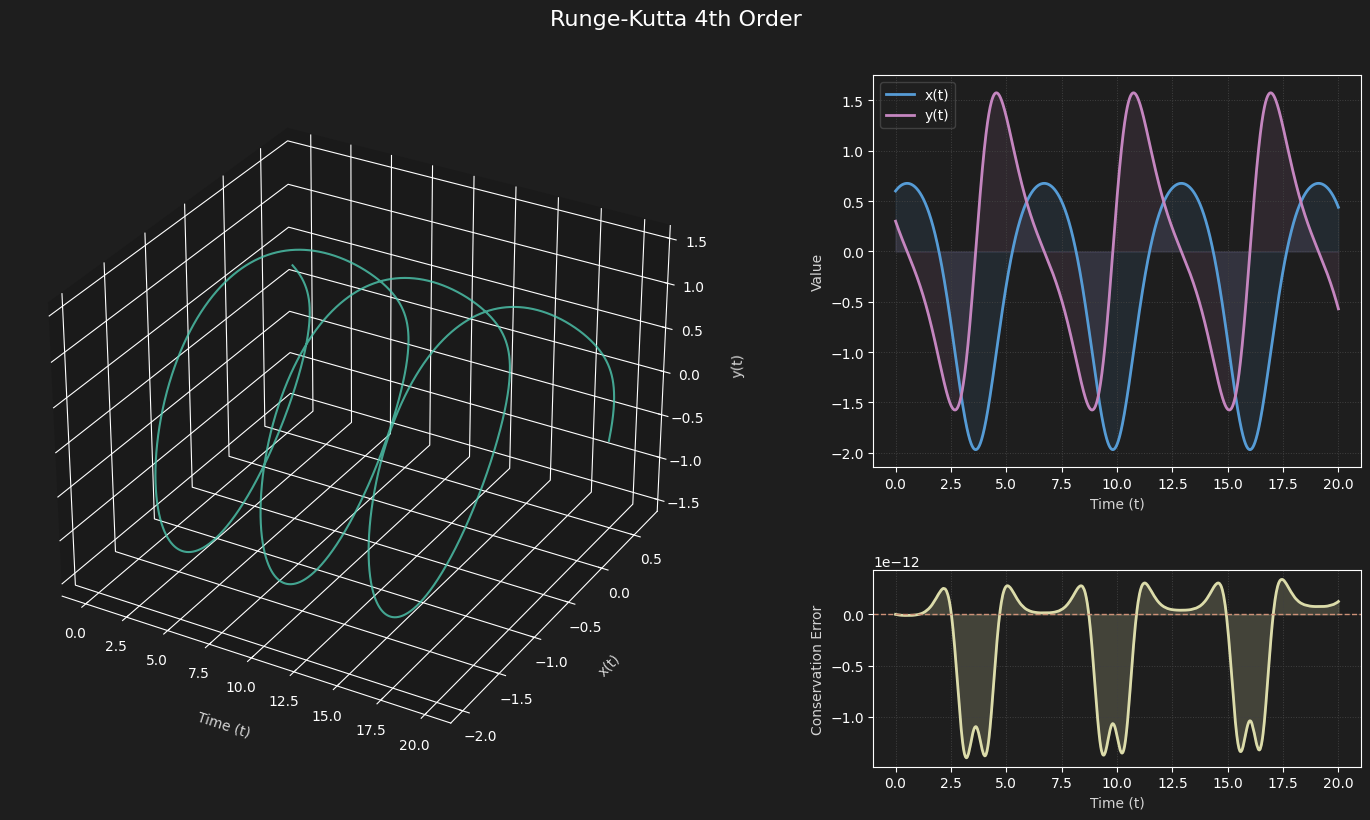


Testing Adams methods...


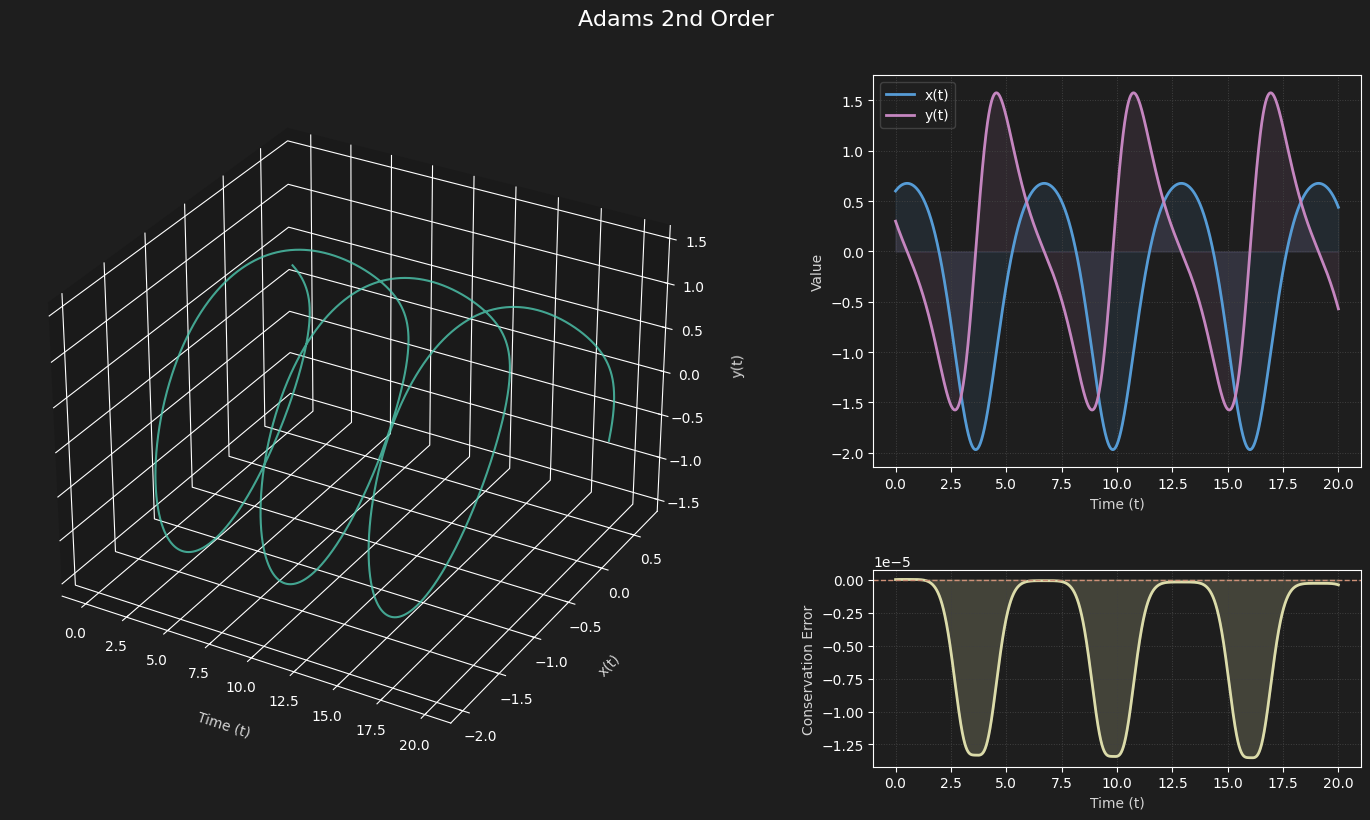

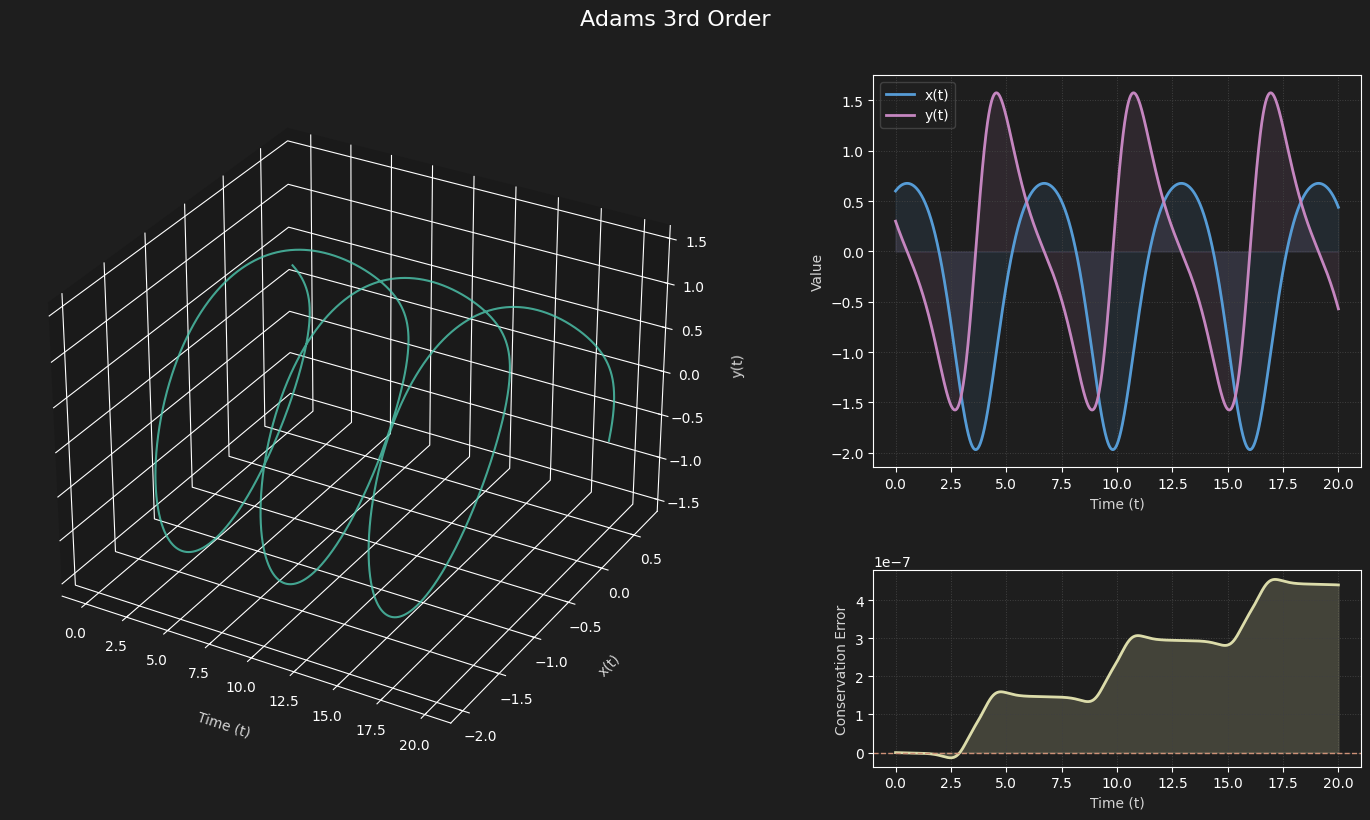

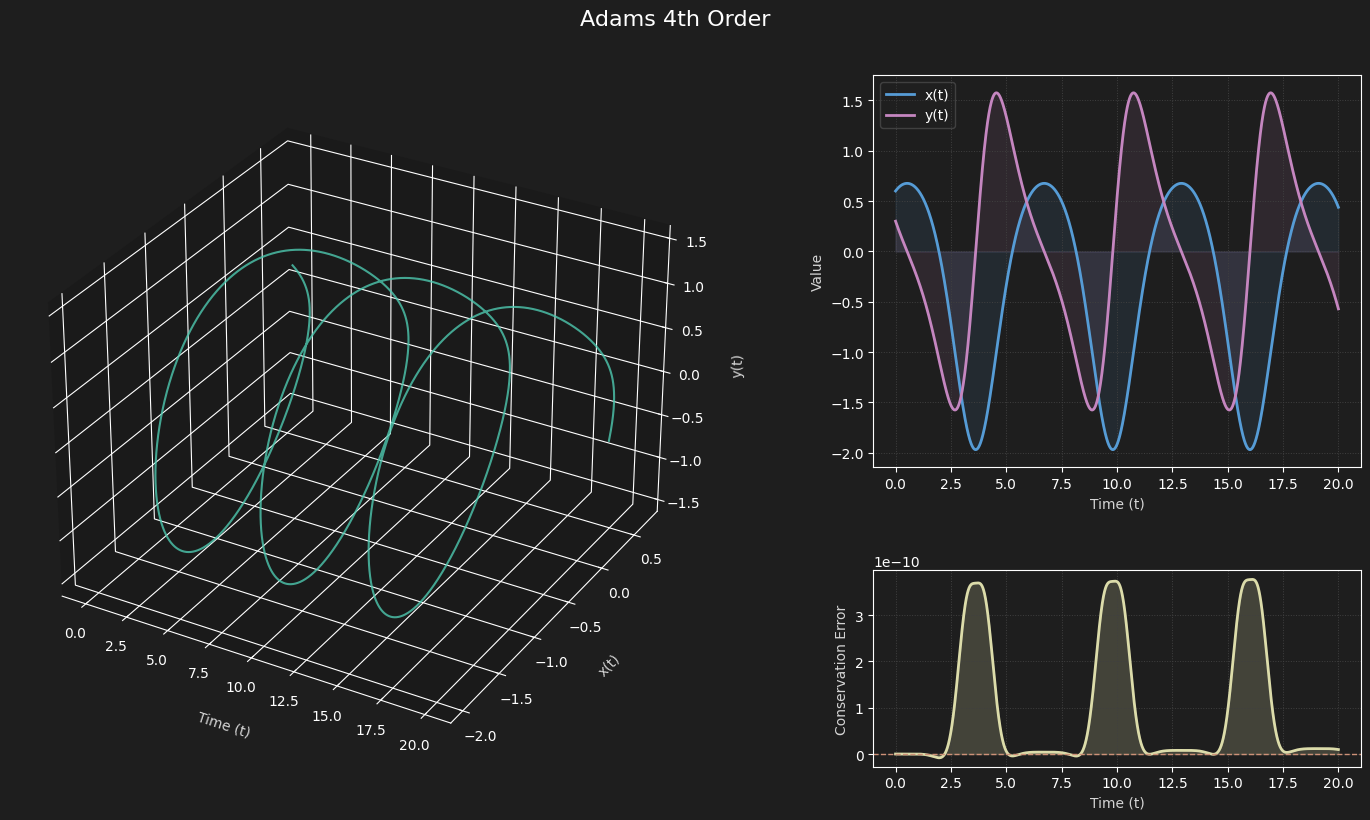


Testing BDF methods...


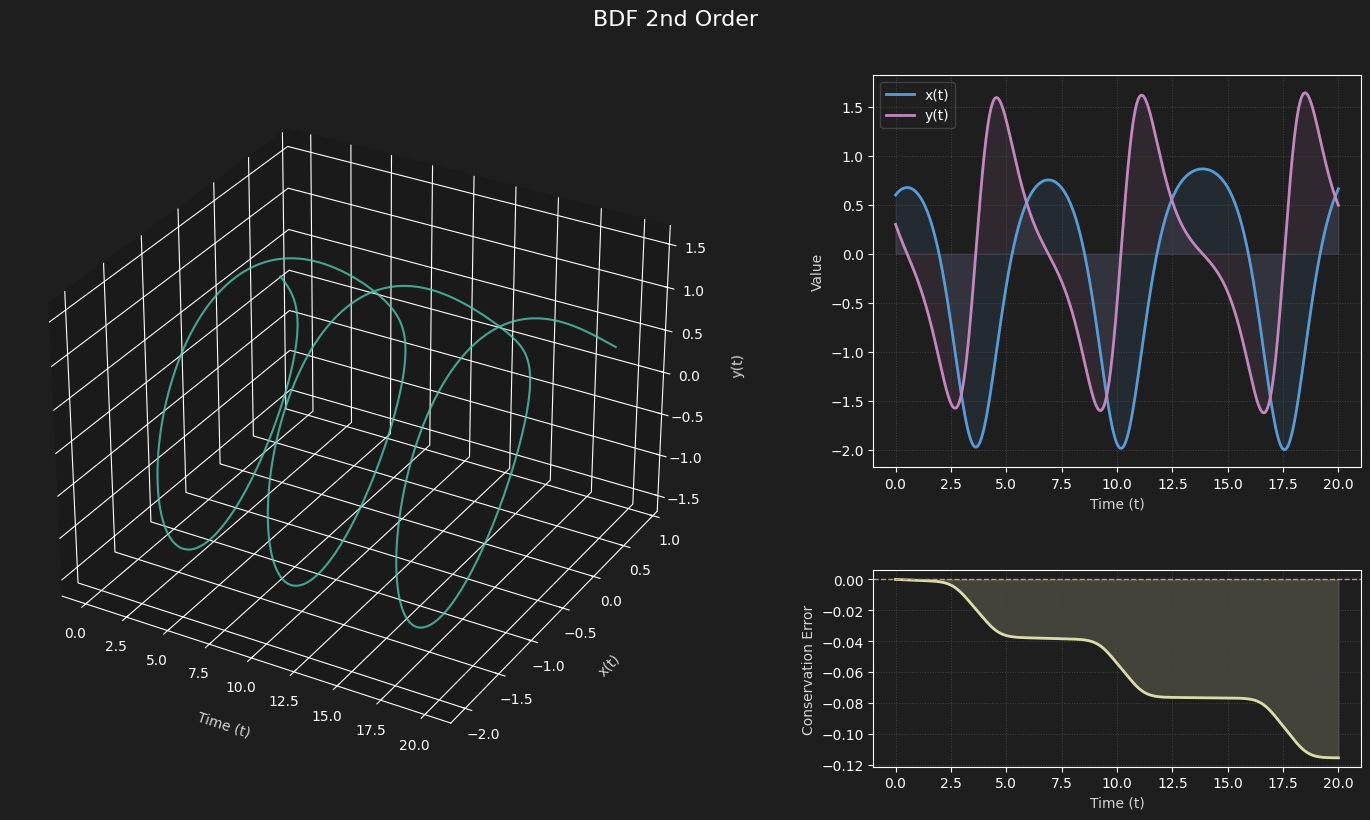

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter
from typing import List, Callable
import numpy as np
from cycler import cycler


plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#1e1e1e'
plt.rcParams['figure.facecolor'] = '#1e1e1e'
plt.rcParams['axes.prop_cycle'] = cycler(color=['#4ec9b0', '#569cd6', '#c586c0', '#dcdcaa', '#ce9178'])

class Vector:
    def __init__(self, *components):
        self.components = components
    
    def __getitem__(self, index):
        return self.components[index]

def f(t: float, u: Vector) -> Vector:
    return Vector(u[1], u[0]**2 - 1)

def first_integral(u: Vector) -> float:
    return (u[0]**3)/3 - u[0] - (u[1]**2)/2


class RungeKuttaMethods:
    @staticmethod
    def explicit_1_order(f, u0: Vector, h: float, N: int) -> List[Vector]:
        us = [u0]
        for _ in range(N):
            t = h * len(us)
            k1 = f(t, us[-1])
            u = Vector(us[-1][0] + h * k1[0], us[-1][1] + h * k1[1])
            us.append(u)
        return us

    @staticmethod
    def explicit_2_order(f, u0: Vector, h: float, N: int) -> List[Vector]:
        us = [u0]
        for _ in range(N):
            t = h * len(us)
            k1 = f(t, us[-1])
            k2 = f(t + h, Vector(us[-1][0] + h * k1[0], us[-1][1] + h * k1[1]))
            u = Vector(
                us[-1][0] + h * (k1[0] + k2[0]) / 2,
                us[-1][1] + h * (k1[1] + k2[1]) / 2
            )
            us.append(u)
        return us

    @staticmethod
    def explicit_3_order(f, u0: Vector, h: float, N: int) -> List[Vector]:
        us = [u0]
        for _ in range(N):
            t = h * len(us)
            k1 = f(t, us[-1])
            k2 = f(t + h/2, Vector(us[-1][0] + h/2 * k1[0], us[-1][1] + h/2 * k1[1]))
            k3 = f(t + h, Vector(us[-1][0] - h*k1[0] + 2*h*k2[0], us[-1][1] - h*k1[1] + 2*h*k2[1]))
            u = Vector(
                us[-1][0] + h * (k1[0] + 4*k2[0] + k3[0]) / 6,
                us[-1][1] + h * (k1[1] + 4*k2[1] + k3[1]) / 6
            )
            us.append(u)
        return us

    @staticmethod
    def explicit_4_order(f, u0: Vector, h: float, N: int) -> List[Vector]:
        us = [u0]
        for _ in range(N):
            t = h * len(us)
            k1 = f(t, us[-1])
            k2 = f(t + h/2, Vector(us[-1][0] + h/2 * k1[0], us[-1][1] + h/2 * k1[1]))
            k3 = f(t + h/2, Vector(us[-1][0] + h/2 * k2[0], us[-1][1] + h/2 * k2[1]))
            k4 = f(t + h, Vector(us[-1][0] + h * k3[0], us[-1][1] + h * k3[1]))
            u = Vector(
                us[-1][0] + h * (k1[0] + 2*k2[0] + 2*k3[0] + k4[0]) / 6,
                us[-1][1] + h * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6
            )
            us.append(u)
        return us


class AdamsMethods:
    @staticmethod
    def explicit_2_order(f, initial_points: List[Vector], h: float, N: int) -> List[Vector]:
        """Адамс-Башфорт 2-го порядка"""
        us = list(initial_points)
        for _ in range(N - len(initial_points) + 1):
            t = h * (len(us) - 1)
            u = Vector(
                us[-1][0] + h * (3/2*f(t, us[-1])[0] - 1/2*f(t-h, us[-2])[0]),
                us[-1][1] + h * (3/2*f(t, us[-1])[1] - 1/2*f(t-h, us[-2])[1])
            )
            us.append(u)
        return us

    @staticmethod
    def explicit_3_order(f, initial_points: List[Vector], h: float, N: int) -> List[Vector]:
        """Адамс-Башфорт 3-го порядка"""
        us = list(initial_points)
        for _ in range(N - len(initial_points) + 1):
            t = h * (len(us) - 1)
            u = Vector(
                us[-1][0] + h * (23/12*f(t, us[-1])[0] - 4/3*f(t-h, us[-2])[0] + 5/12*f(t-2*h, us[-3])[0]),
                us[-1][1] + h * (23/12*f(t, us[-1])[1] - 4/3*f(t-h, us[-2])[1] + 5/12*f(t-2*h, us[-3])[1])
            )
            us.append(u)
        return us

    @staticmethod
    def explicit_4_order(f, initial_points: List[Vector], h: float, N: int) -> List[Vector]:
        """Адамс-Башфорт 4-го порядка"""
        us = list(initial_points)
        for _ in range(N - len(initial_points) + 1):
            t = h * (len(us) - 1)
            u = Vector(
                us[-1][0] + h * (55/24*f(t, us[-1])[0] - 59/24*f(t-h, us[-2])[0] + 
                         37/24*f(t-2*h, us[-3])[0] - 3/8*f(t-3*h, us[-4])[0]),
                us[-1][1] + h * (55/24*f(t, us[-1])[1] - 59/24*f(t-h, us[-2])[1] + 
                         37/24*f(t-2*h, us[-3])[1] - 3/8*f(t-3*h, us[-4])[1])
            )
            us.append(u)
        return us


class BDF:
    @staticmethod
    def explicit_2_order(f, initial_points: List[Vector], h: float, N: int) -> List[Vector]:
        """BDF 2-го порядка"""
        us = list(initial_points)
        for _ in range(N - len(initial_points) + 1):
            t = h * len(us)

            u = Vector(
                4/3*us[-1][0] - 1/3*us[-2][0] + 2/3*h*f(t, us[-1])[0],
                4/3*us[-1][1] - 1/3*us[-2][1] + 2/3*h*f(t, us[-1])[1]
            )
            us.append(u)
        return us

def visualize_results(method_name: str, ts: List[float], us: List[Vector], C: Callable[[Vector], float]):
    fig = plt.figure(figsize=(14, 8), facecolor='#1e1e1e')
    fig.suptitle(method_name, fontsize=16, color='white', y=1.02)
    
    gs = gridspec.GridSpec(2, 2, width_ratios=[1.5, 1], height_ratios=[2, 1])
    
    ax1 = fig.add_subplot(gs[:, 0], projection='3d')
    ax1.plot(ts, [u[0] for u in us], [u[1] for u in us], 
             linewidth=1.5, color='#4ec9b0', alpha=0.8)
    ax1.set_xlabel("\nTime (t)", linespacing=3, color='#d4d4d4')
    ax1.set_ylabel("\nx(t)", linespacing=3, color='#d4d4d4')
    ax1.set_zlabel("\ny(t)", linespacing=3, color='#d4d4d4')
    ax1.xaxis.set_pane_color((0.1, 0.1, 0.1, 0.9))
    ax1.yaxis.set_pane_color((0.1, 0.1, 0.1, 0.9))
    ax1.zaxis.set_pane_color((0.1, 0.1, 0.1, 0.9))
    ax1.grid(color='#404040', linestyle='--', linewidth=0.5)
    
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(ts, [u[0] for u in us], label="x(t)", linewidth=2, color='#569cd6')
    ax2.plot(ts, [u[1] for u in us], label="y(t)", linewidth=2, color='#c586c0')
    ax2.fill_between(ts, [u[0] for u in us], alpha=0.1, color='#569cd6')
    ax2.fill_between(ts, [u[1] for u in us], alpha=0.1, color='#c586c0')
    ax2.set_xlabel("Time (t)", color='#d4d4d4')
    ax2.set_ylabel("Value", color='#d4d4d4')
    ax2.legend(framealpha=0.2, facecolor='#252526')
    ax2.grid(color='#404040', linestyle=':', linewidth=0.7)
    

    ax3 = fig.add_subplot(gs[1, 1])
    C0 = C(us[0])
    error = [C(u) - C0 for u in us]
    ax3.plot(ts, error, linewidth=2, color='#dcdcaa')
    ax3.fill_between(ts, error, alpha=0.2, color='#dcdcaa')
    ax3.axhline(0, color='#ce9178', linestyle='--', linewidth=1)
    ax3.set_xlabel("Time (t)", color='#d4d4d4')
    ax3.set_ylabel("Conservation Error", color='#d4d4d4')
    ax3.grid(color='#404040', linestyle=':', linewidth=0.7)
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.25, hspace=0.35)
    plt.show()


T = 20
h = 2e-3
N = int(T/h)
ts = [h*n for n in range(N+1)]
u0 = Vector(0.6, 0.3)

print("Testing Runge-Kutta methods...")
rk_methods = [
    ("Runge-Kutta 1st Order", RungeKuttaMethods.explicit_1_order),
    ("Runge-Kutta 2nd Order", RungeKuttaMethods.explicit_2_order),
    ("Runge-Kutta 3rd Order", RungeKuttaMethods.explicit_3_order),
    ("Runge-Kutta 4th Order", RungeKuttaMethods.explicit_4_order)
]

for name, method in rk_methods:
    visualize_results(name, ts, method(f, u0, h, N), first_integral)

print("\nTesting Adams methods...")

starting_points = RungeKuttaMethods.explicit_4_order(f, u0, h, 3)

adams_methods = [
    ("Adams 2nd Order", AdamsMethods.explicit_2_order),
    ("Adams 3rd Order", AdamsMethods.explicit_3_order),
    ("Adams 4th Order", AdamsMethods.explicit_4_order)
]

for name, method in adams_methods:
    if "2nd" in name:
        initial_points = starting_points[:2]
    elif "3rd" in name:
        initial_points = starting_points[:3]
    else:
        initial_points = starting_points
    
    visualize_results(name, ts, method(f, initial_points, h, N), first_integral)

print("\nTesting BDF methods...")
bdf_methods = [
    ("BDF 2nd Order", BDF.explicit_2_order)
]

for name, method in bdf_methods:
    initial_points = starting_points[:2]
    visualize_results(name, ts, method(f, initial_points, h, N), first_integral)